In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.rename(columns={'Sex': 'Gender'} , inplace=True)
test.rename(columns={'Sex': 'Gender'} , inplace=True)

In [2]:
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')
train.head()


train shape: (891, 12)
test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()
print('@'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [4]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [5]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Gender           0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [6]:
train['Gender'].value_counts(dropna=False)

male      577
female    314
Name: Gender, dtype: int64

In [7]:
train[['Gender' , 'Survived']].groupby('Gender').mean()

,Survived
Gender,
female,0.742038
male,0.188908


<Axes: xlabel='Gender', ylabel='Survived'>

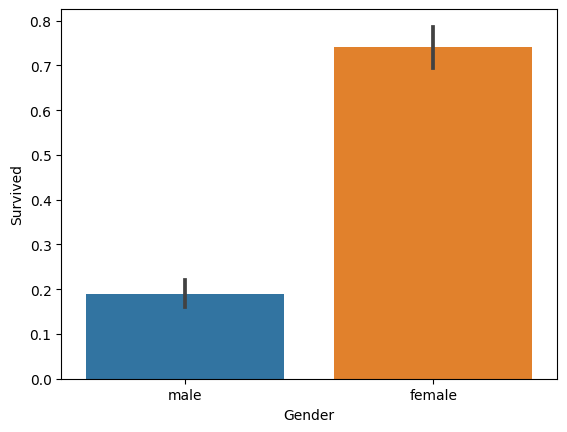

In [8]:
import seaborn as sns
sns.barplot(x='Gender',y='Survived' , data = train)


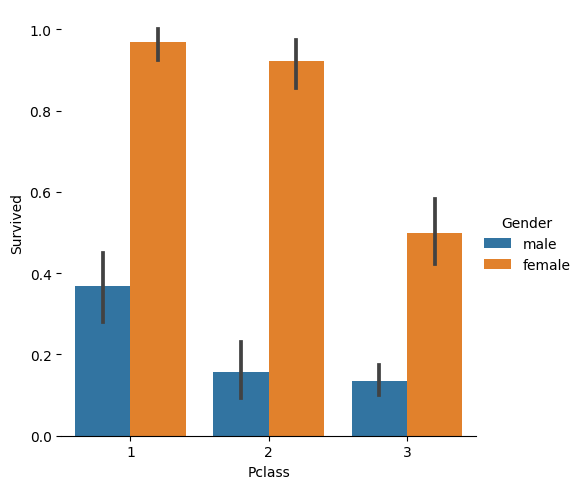

In [9]:
g = sns.catplot(x = 'Pclass' , y = 'Survived' , hue = 'Gender', data = train , kind = 'bar')
g.despine(left = True)

c:\Users\bxand\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\bxand\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


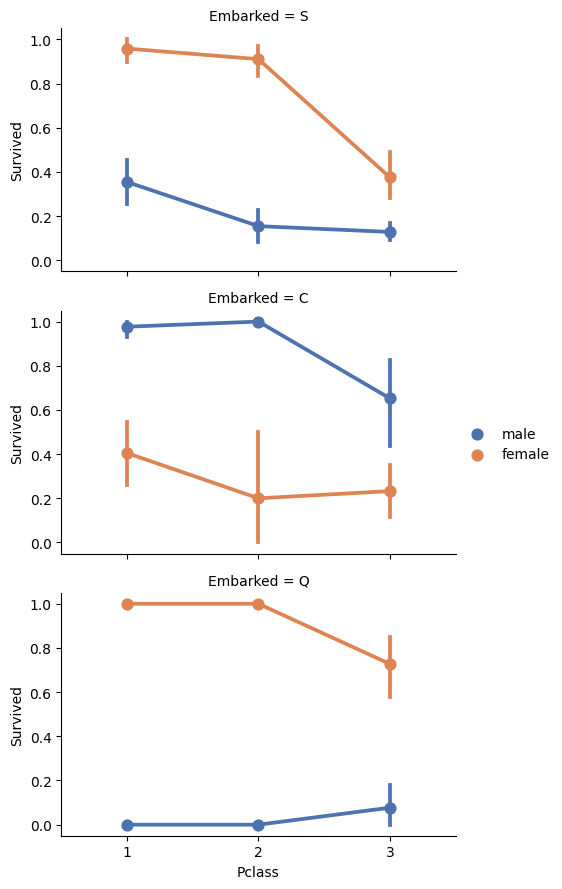

In [10]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Gender', palette='deep')
grid.add_legend()

In [11]:
#outlier removal 

<Axes: >

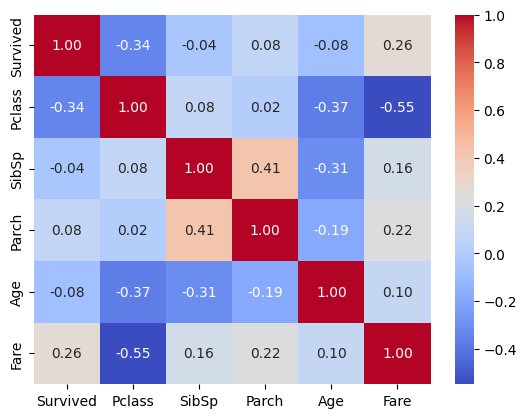

In [12]:
sns.heatmap(train[['Survived' ,'Pclass', 'SibSp' , 'Parch' , 'Age' , 'Fare']].corr() , annot=True,fmt='.2f',cmap='coolwarm')

In [13]:
train['Parch'].value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [14]:
train[['Parch','Survived']].groupby('Parch').mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


<Axes: xlabel='Parch', ylabel='Survived'>

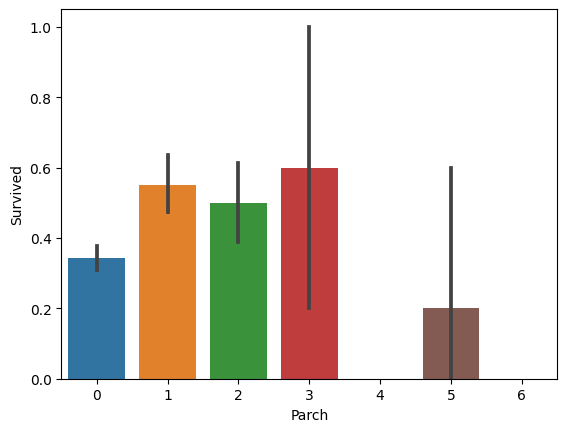

In [15]:
sns.barplot(x='Parch',y='Survived',data=train)

In [16]:
train['Age'].isnull().sum()

177

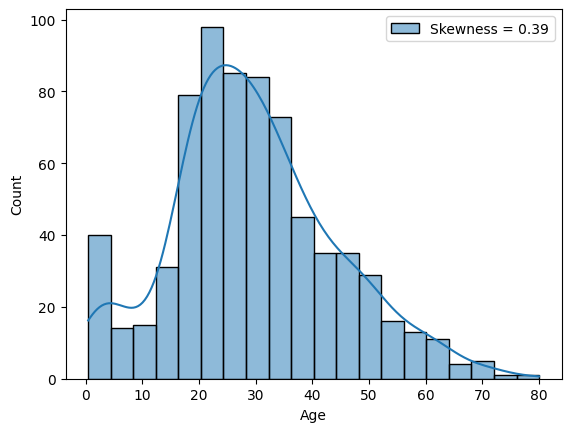

In [17]:
import matplotlib.pyplot as plt
sns.histplot(train['Age'],label=f"Skewness = {train['Age'].skew():.2f}",kde=True)
plt.legend(loc = 'best')

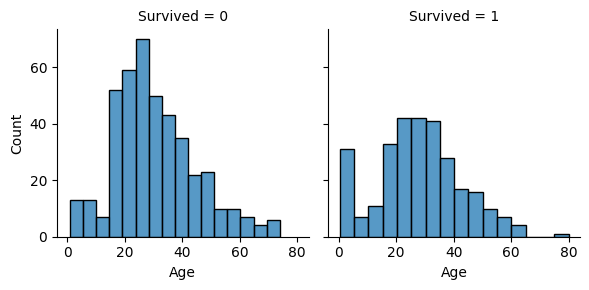

In [18]:
g = sns.FacetGrid(train,col='Survived')
g.map(sns.histplot,'Age',)

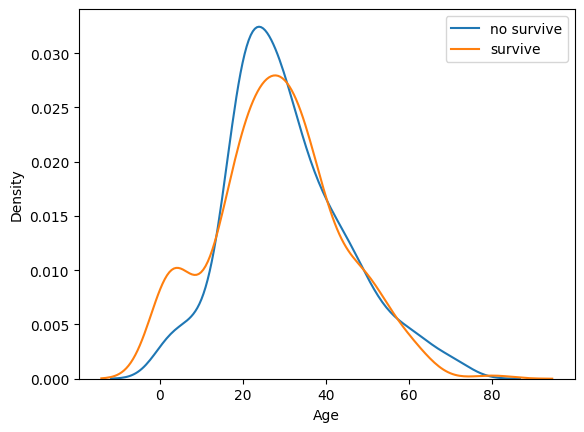

In [19]:
sns.kdeplot(train['Age'][train['Survived']==0],label='no survive')
sns.kdeplot(train['Age'][train['Survived']==1],label='survive')
plt.legend()

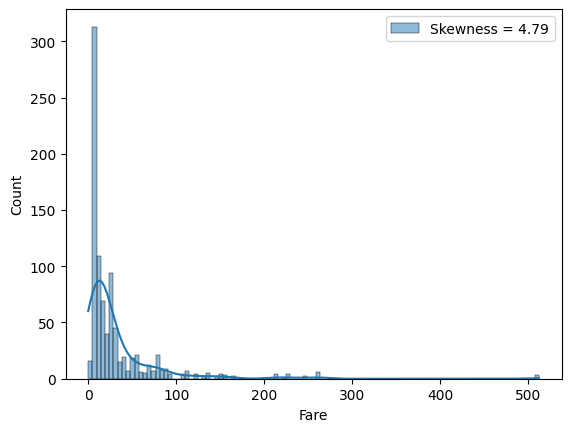

In [20]:
sns.histplot(train['Fare'],label=f"Skewness = {train['Fare'].skew():.2f}",kde=True)
plt.legend(loc = 'best')
#muito skewness => da problema nos modelos.